# Stochastic Process and Modeling Project
Project members are
1. Metawin Sumethiwit 633040173-4
2. Metee Yingyongwatthanakit 633040174-2

In [78]:
# import essential libraries
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
sns.set_theme(style="whitegrid")

In [79]:
METEE_STUDENT_ID = 6_330_401_742
METAWIN_STUDENT_ID = 6_330_401_734
y1: int = METEE_STUDENT_ID % 1000
y2: int = METAWIN_STUDENT_ID % 1000
x0: int = y1 + y2
n = 10_000
N = 10

In [80]:
def get_nth_x(n: int) -> int:
	global x0
	if n == 0:
		return x0
	elif n >= 1:
		return (112 * get_nth_x(n - 1) % 111) + 2

In [81]:
def display_statistical_values(p: float, pn: float, mean: float, variance: float) -> None:
	global N
	print(f"X binomial({N}, {p})")
	print(f"Mean: {mean}")
	print(f"Variance: {variance}")
	print(f"Parameter p: {p}")
	print(f"Estimated p: {pn}")

In [82]:
def plot_histogram(p: float, data_set: np.array, plot_den: bool = False) -> None:
	global n, N
	X = stats.binom.rvs(N, p, size=n)
	# make step plot
	plt.hist(X, bins=np.arange(0, N + 1) - 0.5, density=plot_den, rwidth=0.8)
	plt.title("Histogram of X binomial random variable")
	# set x and y labels
	plt.xlabel("X")
	plt.ylabel("Frequency")
	plt.show()

In [83]:
def get_statistical_values(data_set: np.array) -> tuple:
	mean = np.mean(data_set)
	variance = stats.variation(data_set)
	pn = mean / N # estimate bernouli parameter p
	return mean, variance, pn

In [84]:
# test if function works
x1: int = get_nth_x(1)
x2: int = get_nth_x(2)
x1, x2

(35, 37)

## 1 Simulation
Study binomial random event
i.i.d binomial~(N,p)

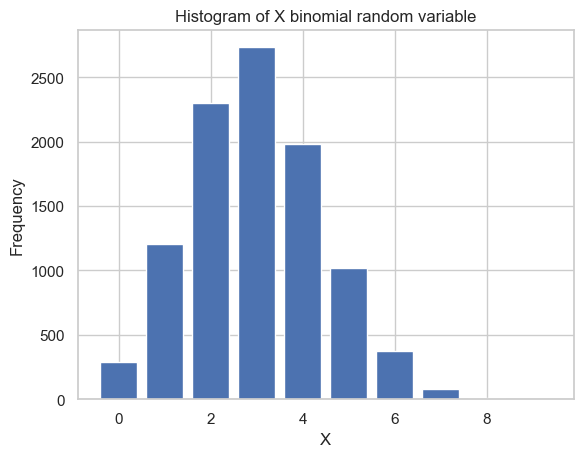

In [85]:
p: float = 0.3
X = stats.binom.rvs(N, p, size=n)
mean, variance, pn = get_statistical_values(X)
plot_histogram(p, X)

In [86]:
display_statistical_values(p, pn, mean, variance)

X binomial(10, 0.3)
Mean: 2.9976
Variance: 0.48098559765115784
Parameter p: 0.3
Estimated p: 0.29975999999999997


### Now we change $$p = 0.31 + \frac{x_2}{1000}$$

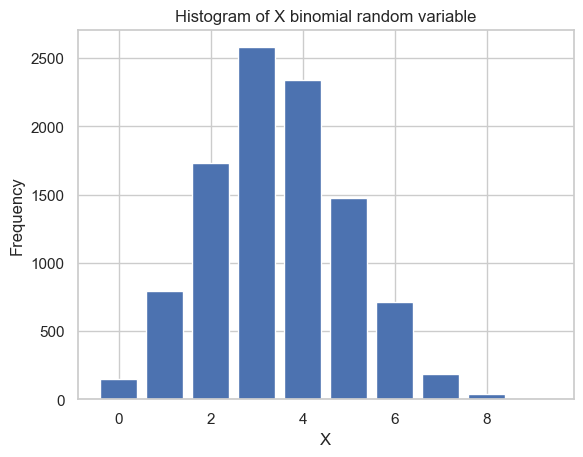

In [87]:
p: float = 0.31 + x2 / 1000
X = stats.binom.rvs(N, p, size=n)
mean, variance, pn = get_statistical_values(X)
plot_histogram(p, X)

In [88]:
display_statistical_values(p, pn, mean, variance)

X binomial(10, 0.347)
Mean: 3.4812
Variance: 0.4242320675152632
Parameter p: 0.347
Estimated p: 0.34812


### We'll compare $p=0.3$ and $p=0.31+\frac{x_2}{1000}$ graphs together

X binomial(10, 0.3)
Mean: 2.9934
Variance: 0.4853491877754648
Parameter p: 0.3
Estimated p: 0.29934
----------------------------
X binomial(10, 0.347)
Mean: 3.4802
Variance: 0.432272918541835
Parameter p: 0.347
Estimated p: 0.34802


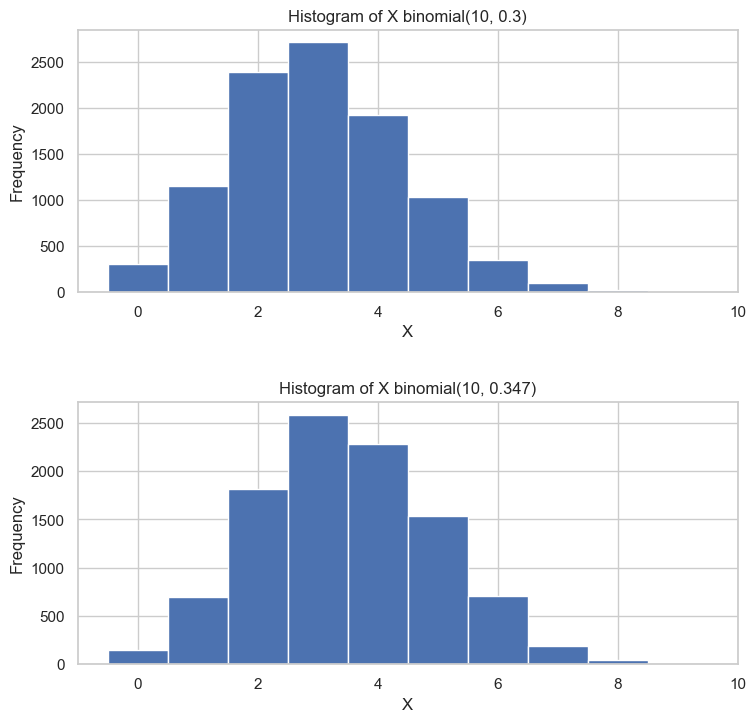

In [89]:
p: float = 0.3
X = stats.binom.rvs(N, p, size=n)
mean, variance, pn = get_statistical_values(X)
# make step plot
fig, ax = plt.subplots(2)
fig.tight_layout(pad=2)
# set fig size
fig.set_size_inches(8, 8)
counts, bins = np.histogram(X, bins=np.arange(0, N + 1) - 0.5)
ax[0].hist(bins[:-1], bins, weights=counts)
# set x and y labels
ax[0].set_xlabel("X")
ax[0].set_ylabel("Frequency")
# print statisticical values
display_statistical_values(p, pn, mean, variance)
print("----------------------------")
p2: float = 0.31 + x2 / 1000
X2 = stats.binom.rvs(N, p2, size=n)
mean2, variance2, pn2 = get_statistical_values(X2)
counts2, bins2 = np.histogram(X2, bins=np.arange(0, N + 1) - 0.5)
ax[1].hist(bins2[:-1], bins2, weights=counts2)
ax[1].set_title(f"Histogram of X binomial({N}, {p2})")
# set x and y labels
ax[1].set_xlabel("X")
ax[1].set_ylabel("Frequency")

# set titles
ax[1].set_title(f"Histogram of X binomial({N}, {p2})")
ax[0].set_title(f"Histogram of X binomial({N}, {p})")

# print statisticical values
display_statistical_values(p2, pn2, mean2, variance2)

# 2 Validate whether Binomail~(N, pn) is a good fit to the data, X

In [90]:
# np.array of binomial random variable; X2 Binomial~(N,pn) from previous analysis
X2

array([2, 2, 2, ..., 2, 4, 3])

In [91]:
counts2

array([ 145,  700, 1817, 2587, 2279, 1531,  703,  191,   42,    5])

In [92]:
H_data = n * stats.binom.pmf(np.arange(10), N, p2)
H_data

array([ 140.97165967,  749.11433239, 1791.33542117, 2538.41098988,
       2360.56672834, 1505.26797195,  666.57476553,  202.40773891,
         40.33431397,    4.76297667])

In [93]:
# compute a statistic Z
Z: float = np.sum(np.power((counts2 - H_data), 2) / (H_data))
Z

10.605292514796641

In [94]:
# calculate Z_alp choose alpha = 0.05
k: int = 1
Z_alp: float = stats.chi2.ppf(0.95, N - 1 - k)
Z_alp

15.50731305586545

In [95]:
# chi square test
if Z < Z_alp:
	print("H0 is accepted")
else:
	print("H0 is rejected")

H0 is accepted
